### Plan de trabajo
Se han recopilado los datos históricos de precipitaciones en Barcelona desde 1876. Los datos cuentan con la media mensual de precipitaciones. <br>

Una vez obtenidos los datos se hace un análisis descriptivo de las variables, viendo la evolución de la media de precipitaciones anuales a lo largo de los años y las tendencias mensuales. Para ver si hay tendencias de crecimiento o alguna característica a destacar. <br>

Una vez hecho el análisis descriptivo se aplican técnicas de Machine Learning para ganar más insight de los datos y ver si hay patrones que expliquen la distribución de las precipitaciones. <br>

Para hacer el Machine Learning a parte de la información de las precipitaciones se ha añadido el histórico de temperaturas por cada mes que teníamos, para ver si se encuentra una relación entre las medias de temperaturas mensuales y la media de precipitaciones. <br>

Se usará un modelo de regresión con la temperatura y el mes del año y como target la media de lluvias de ese mes, se evaluará el modelo con las distintas métricas de evaluación de modelos de regresión para ver si los resultados encontrados con el modelo son satisfactorios o en caso que no lo sean como se pueden mejorar. <br>
Posteriormente se realiza modelo de clasificación agrupando el target de las precipitaciones en dos grupos en función de la media, evaluado con las distintas métricas, realizando una matriz de confusión para ver si el modelo resultante es capaz de clasificar los meses con las distintas acumulaciones de precipitaciones. 
Finalmente se realiza modelo no supervisado para ver los clusters que obtenemos y qué información nos dan. Se presentarán los resultados obtenidos evaluando los clusters y viendo que información relevante nos aportan.<br>

Una vez hecho el proceso de análisis se podrá ver si hay tendencias especiales en cuanto a precipitaciones mensuales para la ciudad de Barcelona, como pueden ser una tendencia a más o menos lluvia a lo largo de los años o concentración de lluvia en meses concretos y a partir de esto hacer recomendaciones para prepararse para estas tendencias. 


### Analisis descriptivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Any', ylabel='Precipitacions'>

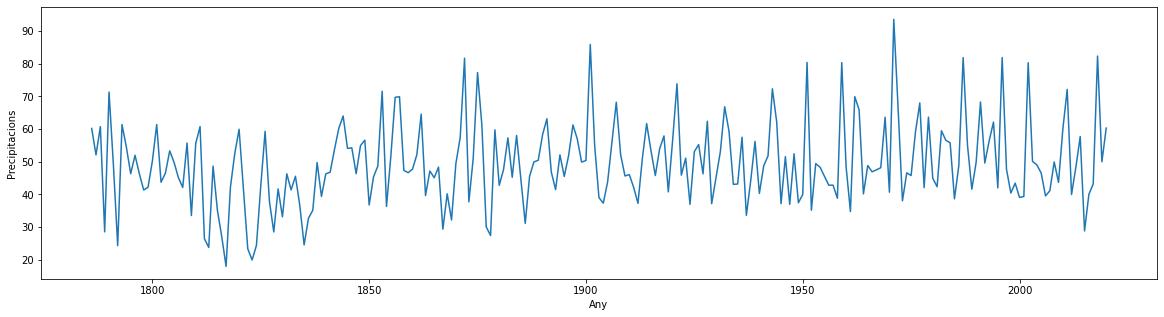

In [2]:
#Grafico de las medias anuales
df_daily = pd.read_csv('daily_9y.csv')
df = pd.read_csv('mensual.csv')
df_long = pd.read_csv('mensual_long.csv')
plot_1 = df_long.groupby('Any').mean()
f, ax = plt.subplots(figsize = (20,5))
sns.lineplot(data = plot_1, x = 'Any', y = 'Precipitacions')

<AxesSubplot:xlabel='Any', ylabel='Precipitacions'>

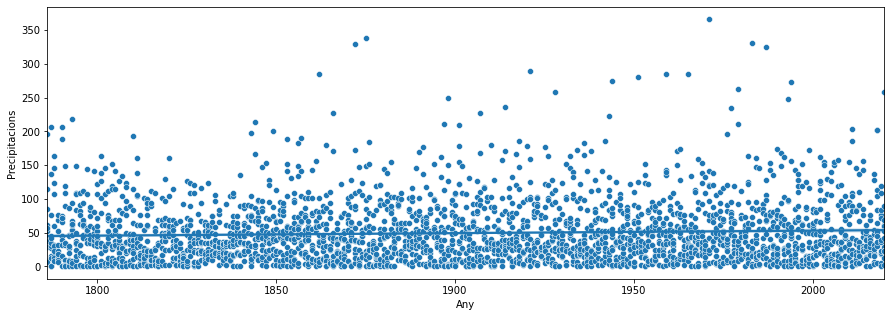

In [3]:
#Scatter plot de los meses con la tendencia media. 
f, ax = plt.subplots(figsize = (15,5))
ax = sns.scatterplot(data = df_long, x = 'Any', y = 'Precipitacions')
sns.regplot(data = df_long, x='Any', y = 'Precipitacions', scatter = False, ax = ax)

Se aprecia la irregularidad de las medias anuales, con periodos de mas preccipitaciones y periodos de menos, se aprecia una ligera subida de la media de precipitacion anual a lo largo de los años pero no se ve un cambio muy significativo. 

In [4]:
#Tendencias de medias anuales por estaciones. 
winter = df_long[df_long['Mes'].isin([12,1,2,])]
spring = df_long[df_long['Mes'].isin([3,4,5,])]
sumer = df_long[df_long['Mes'].isin([6,7,8,])]
autum = df_long[df_long['Mes'].isin([9,10,11])]

<AxesSubplot:xlabel='Any', ylabel='Precipitacions'>

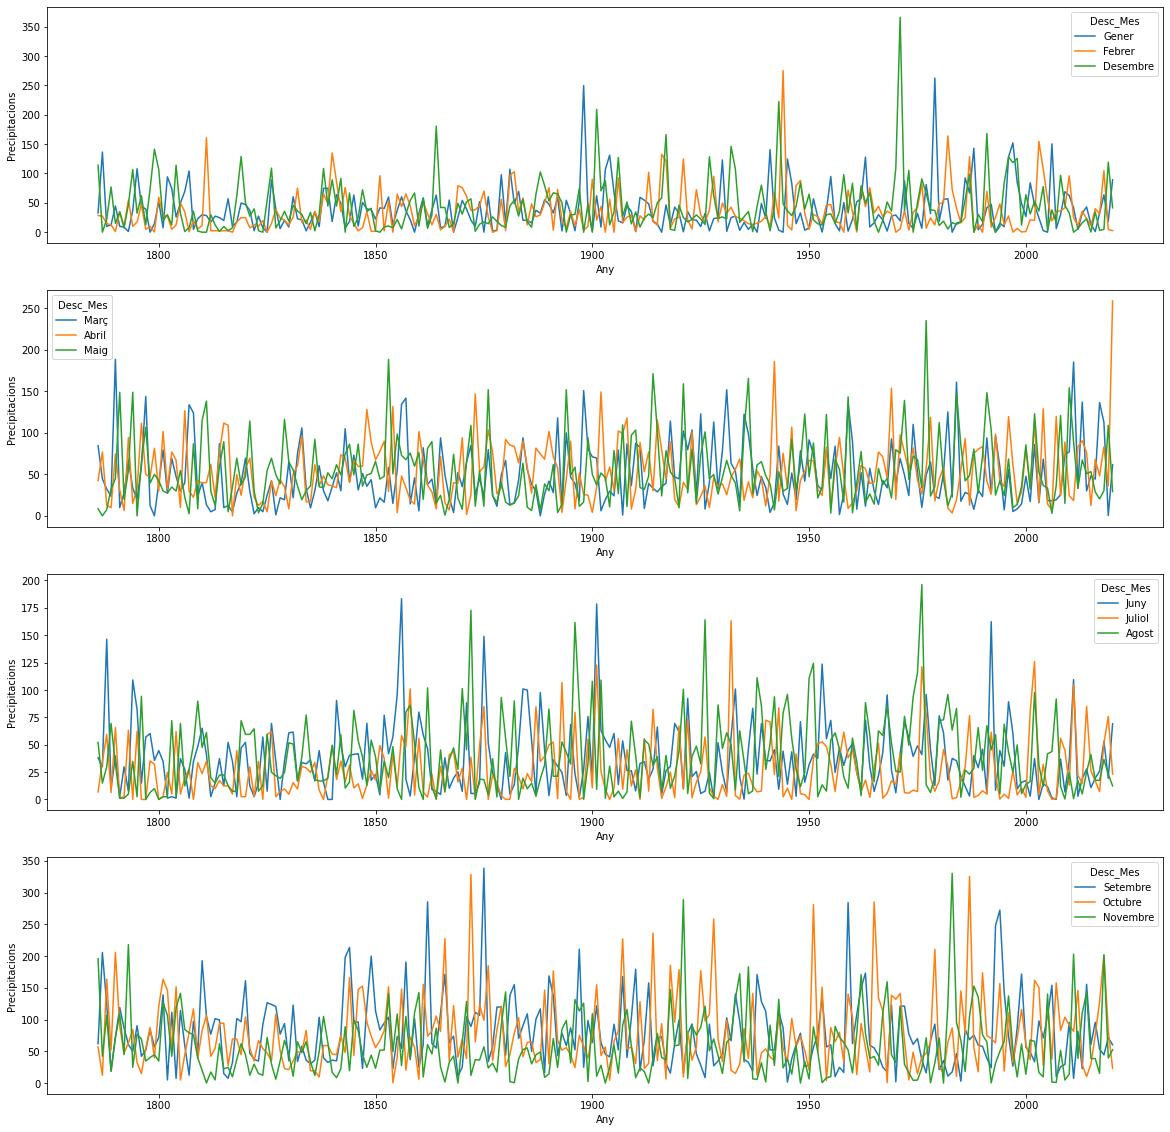

In [5]:
f, ax = plt.subplots(ncols = 1, nrows = 4, figsize = (20,20))
sns.lineplot(data = winter, x = 'Any', y = 'Precipitacions', hue = 'Desc_Mes',ax = ax[0] )
sns.lineplot(data = spring, x = 'Any', y = 'Precipitacions', hue = 'Desc_Mes',ax = ax[1])
sns.lineplot(data = sumer, x = 'Any', y = 'Precipitacions', hue = 'Desc_Mes',ax = ax[2])
sns.lineplot(data = autum, x = 'Any', y = 'Precipitacions', hue = 'Desc_Mes',ax = ax[3])

<AxesSubplot:xlabel='Any', ylabel='Precipitacions'>

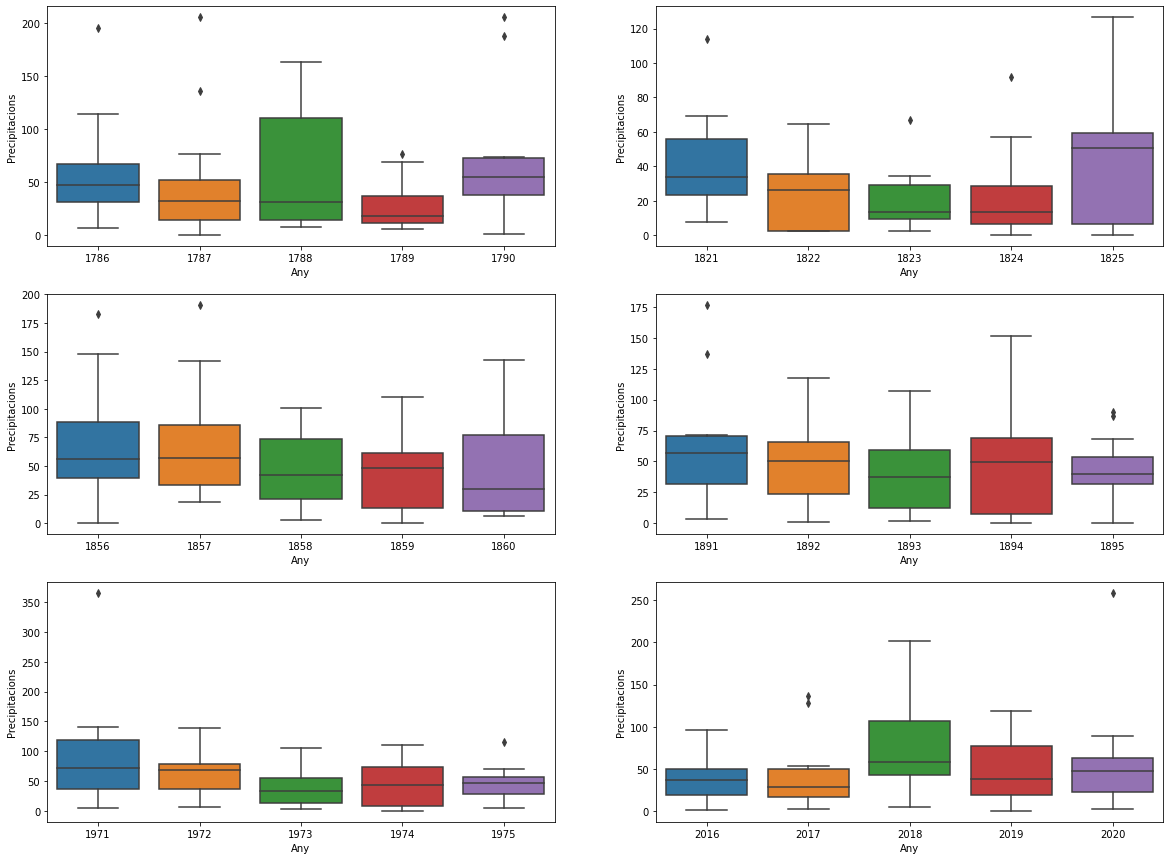

In [6]:
#Boxplot de distintos años seleccionados por intervalos para hacernos una idea de distribuciones y outliers. 
f, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (20,15))
sns.boxplot(x = df_long['Any'][:60],y = df_long['Precipitacions'], ax = ax[0,0] )
sns.boxplot(x = df_long['Any'][420:480],y = df_long['Precipitacions'],ax = ax[0,1])
sns.boxplot(x = df_long['Any'][840:900],y = df_long['Precipitacions'],ax = ax[1,0])
sns.boxplot(x = df_long['Any'][1260:1320],y = df_long['Precipitacions'],ax = ax[1,1])
sns.boxplot(x = df_long['Any'][2220:2280],y = df_long['Precipitacions'],ax = ax[2,0])
sns.boxplot(x = df_long['Any'][2760:],y = df_long['Precipitacions'],ax = ax[2,1])

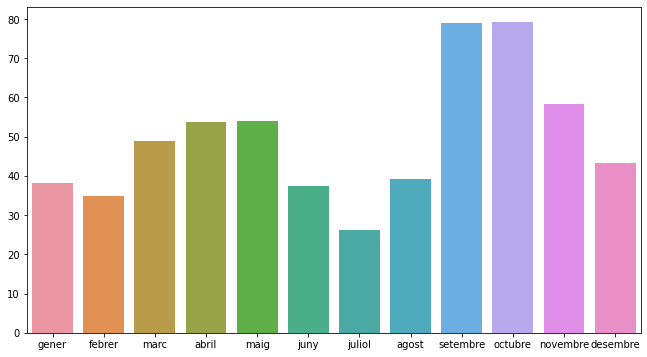

In [7]:
#Medias mensuales de todos los años 
p_means = df.drop('any',1)
f, ax = plt.subplots(figsize = (11,6)) 
sns.set_color_codes('pastel')
bar_traits_1 = sns.barplot(x = p_means.mean().keys() , y = p_means.mean())
plt.show()

Se puede apreciar una clara diferencia en las medias mensuales. Tanto en los graficos por estaciones como en el grafico de medias mensuales de todos los años se ve como septiembre y octubre tienen una media bastante mas elevada que las otras estaciones y julio con la media mas baja. 

### Conclusiones analisis descriptivo 
No se aprecia una tendencia significativa a la alza o a la baja de media de lluvia a lo largo de los años, se puede ver la variabilidad de medias de un año al otro. Se ve claramente como hay meses con una concentracion de lluvia mas elevada que otros. 

### Conclusiones Finales 
No se ha encontrado ningun patron de prediccion de lluvia segun los meses los años o la temperatura con los modelos de Machine Learning supervisados. Todos los modelos han resultado deficientes a la hora de predecir la lluvia y no nos han dado mas informacion que la inicial. <br>

Con el modelo no supervisado se ha visto que el cluster se realiza en funcion de la acumulacion de lluvia, agrupando los datos con mas lluvia y los que menos, una vez analisados los clusters se ve coinciden con lo que hemos visto en el analisis descriptivo que hay ciertos mese con una media de lluvia más alta que otros y por tanto los clusters tienden a tener una frecuencia de meses mucho mas elevada que otro, por ejemplo el mes de julio (el de media de precipitaciones mas baja) pertenece en su mayoria al cluster 0 (menos precipitaciones) y por lo contrario el mes de septiembre pertenece en su mayoria al cluster 2. No se ha encontrado ninguna tendencia con respeto a la temperatura y la media de temperatura de los distintos clusters es casi idéntica.  

No se encuentra ningun patron relevante a parte de que suele llover más en Septiembre y Octubre que el resto del año. Se recomienda que la ciudad este preparada para estos periodos de alta lluvia, para evitar possibles inundaciones o calapsos en los servicios de desagüe. 